# This File for 👀 of Data

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from pymongo import MongoClient

import datetime

In [2]:
def getdata(stock,db):
    stock=str(stock)
    mongo_client=MongoClient()
    db=mongo_client[db]
    data=db[stock].find()
    df=pd.DataFrame(list(data))
    df.drop("_id",axis=1,inplace=True)
    ###Covert to UTC to get the correct Values
    df['Datetime']=pd.to_datetime(df['Datetime']).dt.tz_localize('UTC').dt.tz_convert('Asia/Kolkata')
    #df['Datetime']=pd.to_datetime(df['Datetime'])
    df=df.set_index('Datetime')
    return df

In [32]:
data=getdata('3MINDIA','Market')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-16,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_ns.dropna(axis=0,how='any',inplace=True)
df_ns['Volume']=df_ns['Volume'].astype(int)
df_ns=df_ns[['Open','High','Low','Adj Close','Volume']]
df_ns=df_ns.reset_index()
df_ns=df_ns.rename(columns={'Date':'Datetime','Adj Close':'Close'})

AttributeError: 'numpy.ndarray' object has no attribute 'isempty'

IndexError: index 0 is out of bounds for axis 0 with size 0

In [33]:
stock='3MINDIA'

,Open,High,Low,Close,Volume
Datetime,,,,,
2002-07-01 05:30:00+05:30,283.250000,291.950012,283.250000,287.000000,740
2002-07-02 05:30:00+05:30,290.000000,294.899994,288.000000,288.000000,4610
2002-07-03 05:30:00+05:30,294.950012,295.000000,291.549988,294.799988,3940
2002-07-04 05:30:00+05:30,295.950012,324.299988,295.000000,324.299988,16297
2002-07-05 05:30:00+05:30,330.000000,331.000000,313.049988,317.799988,4474
...,...,...,...,...,...
2021-11-10 05:30:00+05:30,27025.000000,27230.050781,26850.000000,26876.400391,1215
2021-11-11 05:30:00+05:30,26705.000000,27484.900391,26564.199219,26992.250000,2502
2021-11-12 05:30:00+05:30,27300.000000,27300.000000,26400.000000,26715.800781,4455


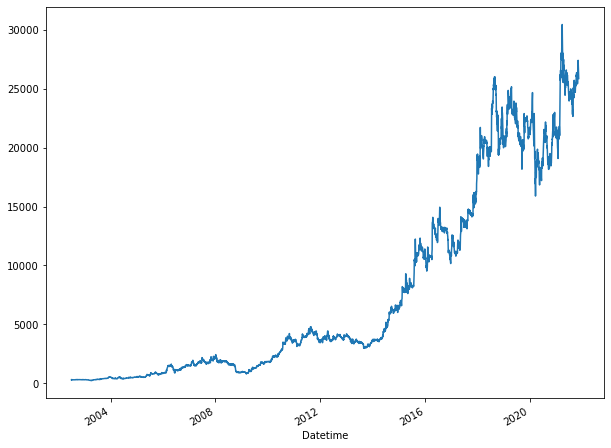

In [37]:
daily=getdata(stock,'Market')
daily['Close'].plot(figsize=(10,8));
daily

In [5]:
df5=getdata(stock,'Market5')
#daily['Close'].plot(figsize=(10,8));
df5.tail()

,Open,High,Low,Close,Volume
Datetime,,,,,
2021-11-15 15:05:00+05:30,3169.649902,3170.949951,3168.199951,3170.000000,7458
2021-11-15 15:10:00+05:30,3169.949951,3170.949951,3166.300049,3169.500000,12486
2021-11-15 15:15:00+05:30,3170.000000,3170.399902,3168.300049,3170.399902,12864
2021-11-15 15:20:00+05:30,3170.899902,3171.500000,3163.149902,3166.100098,24748
2021-11-15 15:25:00+05:30,3167.600098,3169.000000,3164.100098,3165.000000,11170


In [6]:
df1=getdata(stock,'Market1')
#daily['Close'].plot(figsize=(10,8));
df1.tail()

,Open,High,Low,Close,Volume
Datetime,,,,,
2021-11-15 15:25:00+05:30,3167.600098,3168.000000,3166.149902,3167.949951,2037.0
2021-11-15 15:26:00+05:30,3167.949951,3167.949951,3166.050049,3167.899902,1694.0
2021-11-15 15:27:00+05:30,3167.100098,3169.000000,3167.000000,3167.850098,3060.0
2021-11-15 15:28:00+05:30,3167.850098,3167.850098,3164.449951,3165.000000,2658.0
2021-11-15 15:29:00+05:30,3165.000000,3166.000000,3164.100098,3165.000000,1721.0
